In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
blog_df = pd.read_csv('C:/Users/nsriv/Desktop/PC/Downloads/Compressed/archive/blogtext.csv')

In [3]:
blog_df.shape

(681284, 7)

In [4]:
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
206203,3889807,female,24,indUnk,Aquarius,"05,August,2004",Right after urlLink This Modern World ...
542824,1162265,male,17,Student,Aries,"10,noviembre,2003",Video Games are like drugs. I feel lik...
182765,1826527,male,25,Science,Cancer,"16,October,2003","Well, it's officially worry t..."
86063,3588546,male,16,Technology,Aquarius,"15,June,2004","Okay, here's something different ..."
419546,1470319,female,26,Museums-Libraries,Libra,"15,May,2003",Ok ladies and Chris. I am sitting...


In [5]:
blog_df = pd.read_csv('C:/Users/nsriv/Desktop/PC/Downloads/Compressed/archive/blogtext.csv',nrows=50000)
#we are restricting to 50000 rows because it is taking long time and memory error happens.

In [6]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [7]:

blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50000 non-null  int64 
 1   gender  50000 non-null  object
 2   age     50000 non-null  int64 
 3   topic   50000 non-null  object
 4   sign    50000 non-null  object
 5   date    50000 non-null  object
 6   text    50000 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [8]:
blog_df.gender.value_counts()

male      25815
female    24185
Name: gender, dtype: int64

# EDA with Pandas Profiler

In [9]:
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

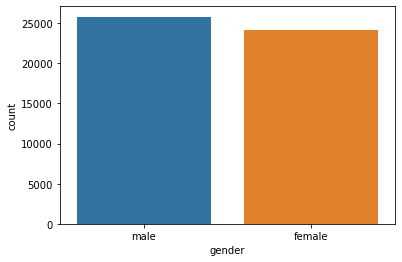

In [10]:
sns.countplot(x='gender',data=blog_df)

<AxesSubplot:xlabel='sign', ylabel='count'>

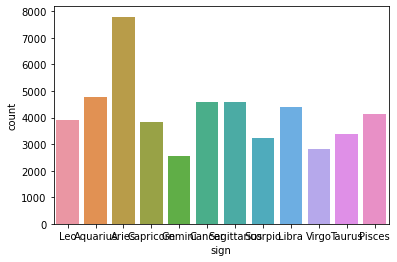

In [11]:
sns.countplot(x='sign',data=blog_df)

In [12]:
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

# 2 Preprocess rows of the “text” column 

a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [13]:
# remove unwanted chars other than alphanumeric
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [14]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [15]:
#covert text to lower
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [16]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [17]:
#remove unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [18]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [19]:
#remove stopwords
stopwords=set(stopwords.words('english'))

In [20]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [21]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [22]:
# drop id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [23]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


# 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [24]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [25]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [26]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [27]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


# 4. Separate features and labels, and split the data into training and testing 

In [28]:
X= blog_df.text
y = blog_df.labels

In [29]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [30]:
print(X_train.shape)
print(y_train.shape)

(40000,)
(40000,)


In [31]:
print(X_test.shape)
print(y_test.shape)

(10000,)
(10000,)


In [32]:
X_test

23656    yes since ive stopped bytheres really much cat...
27442                                        urllink blast
40162    stumbled across site called stopped clock well...
8459     well much thought panick prayer know ia suppos...
8051                                  urllink nbsp urllink
                               ...                        
44231    urllink habitat humanity intl jimmy carter hab...
18034    1 friend mine got new job supervisors name sto...
33856    usually band makes record write 10 12 songs pu...
15906    age grow well duh guess obvious statement make...
40899    im tired morning cant even think straight went...
Name: text, Length: 10000, dtype: object

# 5. Vectorize the features
a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [33]:
cvect = CountVectorizer(ngram_range=(1,2))

In [34]:
cvect.fit(X_train)
len(cvect.vocabulary_)

2658973

In [35]:
cvect.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 draw',
 '00 duke',
 '00 games',
 '00 laughed',
 '00 match',
 '00 one',
 '00 soooooo',
 '00 tcr1',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 calories',
 '000 chunk',
 '000 first',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 nothing',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 songs',
 '000 subject',
 '000 yen',
 '0000',
 '0000 blinking',
 '0000 new',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 fontsize',
 '0000001',
 '0000001 zbaras',
 '000000flickryourcomment',
 '000000flickryourcomment flickrframe',
 '000000this',
 '000000this certifies',
 '000001',
 '000001 maybe',
 '00000800',
 '00000800 thats',
 '000021php',
 '000021php less',
 '0000ff',
 '0000ff click',
 '0000ff fontsize',
 '0001',
 '0001 chances',
 '0001 nice',
 '00011000101',
 '00011000101 benji',
 '001',
 '001 003',
 '001 first',
 '001 spell',
 '001 urllink',
 '002',
 '002 44th',
 '002 candidates',
 '002 c

In [36]:
X_train_ct = cvect.transform(X_train)

In [37]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [38]:
X_train_ct

<40000x2658973 sparse matrix of type '<class 'numpy.int64'>'
	with 7207062 stored elements in Compressed Sparse Row format>

In [39]:
X_train_ct[0]

<1x2658973 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [40]:
X_test_ct = cvect.transform(X_test)

In [41]:
X_test_ct

<10000x2658973 sparse matrix of type '<class 'numpy.int64'>'
	with 1244239 stored elements in Compressed Sparse Row format>

In [42]:
cvect.get_feature_names()[:10]

['00',
 '00 damarcus',
 '00 damn',
 '00 draw',
 '00 duke',
 '00 games',
 '00 laughed',
 '00 match',
 '00 one',
 '00 soooooo']

In [43]:
print(X_train_ct)

  (0, 24790)	1
  (0, 24938)	1
  (0, 196030)	1
  (0, 196064)	1
  (0, 472550)	1
  (0, 472558)	1
  (0, 553986)	1
  (0, 553989)	1
  (0, 1056600)	1
  (0, 1103708)	1
  (0, 1104108)	1
  (0, 1104762)	1
  (0, 1105040)	1
  (0, 1330118)	1
  (0, 1339085)	1
  (0, 1375960)	1
  (0, 1376293)	1
  (0, 1402683)	1
  (0, 1404156)	1
  (0, 1530012)	1
  (0, 1530085)	1
  (0, 1946305)	1
  (0, 1946313)	1
  (0, 1964418)	1
  (0, 1964423)	1
  :	:
  (39999, 2410716)	1
  (39999, 2474799)	1
  (39999, 2475638)	1
  (39999, 2511306)	1
  (39999, 2514073)	1
  (39999, 2528806)	2
  (39999, 2530828)	1
  (39999, 2532333)	1
  (39999, 2587514)	1
  (39999, 2587753)	1
  (39999, 2591946)	1
  (39999, 2592717)	1
  (39999, 2603815)	1
  (39999, 2604128)	1
  (39999, 2608979)	2
  (39999, 2609232)	1
  (39999, 2609337)	1
  (39999, 2615448)	2
  (39999, 2615888)	1
  (39999, 2615912)	1
  (39999, 2618623)	2
  (39999, 2618637)	1
  (39999, 2618898)	1
  (39999, 2621571)	1
  (39999, 2621956)	1


In [44]:
print(X_test_ct)

  (0, 51363)	1
  (0, 68283)	1
  (0, 70210)	1
  (0, 105064)	1
  (0, 105667)	1
  (0, 107303)	1
  (0, 107726)	1
  (0, 116533)	1
  (0, 117325)	1
  (0, 136713)	1
  (0, 145284)	1
  (0, 146831)	1
  (0, 238529)	1
  (0, 238766)	1
  (0, 246888)	1
  (0, 247319)	1
  (0, 251476)	1
  (0, 252290)	1
  (0, 274830)	1
  (0, 276158)	1
  (0, 349435)	1
  (0, 383251)	1
  (0, 386139)	1
  (0, 386649)	1
  (0, 402933)	1
  :	:
  (9999, 2514144)	1
  (9999, 2515808)	1
  (9999, 2516336)	1
  (9999, 2526492)	1
  (9999, 2527001)	1
  (9999, 2528806)	1
  (9999, 2529512)	1
  (9999, 2545727)	1
  (9999, 2548084)	1
  (9999, 2551318)	1
  (9999, 2554188)	1
  (9999, 2567911)	2
  (9999, 2575394)	2
  (9999, 2575842)	1
  (9999, 2575950)	1
  (9999, 2580417)	1
  (9999, 2580428)	1
  (9999, 2589575)	1
  (9999, 2601912)	1
  (9999, 2617737)	1
  (9999, 2643435)	1
  (9999, 2643876)	1
  (9999, 2649230)	1
  (9999, 2649788)	1
  (9999, 2651385)	1


# 6 Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference 

In [45]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [46]:
label_counts

{'male': 25815,
 '15': 1,
 'Student': 10660,
 'Leo': 3904,
 '33': 1,
 'InvestmentBanking': 85,
 'Aquarius': 4784,
 'female': 24185,
 '14': 1,
 'indUnk': 17560,
 'Aries': 7795,
 '25': 1,
 'Capricorn': 3819,
 '17': 1,
 'Gemini': 2558,
 '23': 1,
 'Non-Profit': 491,
 'Cancer': 4589,
 'Banking': 283,
 '37': 1,
 'Sagittarius': 4571,
 '26': 1,
 '24': 1,
 'Scorpio': 3243,
 '27': 1,
 'Education': 2646,
 '45': 1,
 'Engineering': 1402,
 'Libra': 4378,
 'Science': 705,
 '34': 1,
 '41': 1,
 'Communications-Media': 1603,
 'BusinessServices': 416,
 'Sports-Recreation': 120,
 'Virgo': 2827,
 'Taurus': 3390,
 'Arts': 1817,
 'Pisces': 4142,
 '44': 1,
 '16': 1,
 'Internet': 1420,
 'Museums-Libraries': 285,
 'Accounting': 364,
 '39': 1,
 '35': 1,
 'Technology': 4379,
 '36': 1,
 'Law': 308,
 '46': 1,
 'Consulting': 243,
 'Automotive': 116,
 '42': 1,
 'Religion': 258,
 '13': 1,
 'Fashion': 1805,
 '38': 1,
 '43': 1,
 'Publishing': 207,
 '40': 1,
 'Marketing': 414,
 'LawEnforcement-Security': 125,
 'HumanReso

# 7. Transform the labels 
As we have noticed before, in this task each example can have multiple tags. To deal with
such kind of prediction, we need to transform labels in a binary form and the prediction will be
a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn
a. Convert your train and test labels using MultiLabelBinarizer

In [47]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [48]:
y_train = binarizer.fit_transform(y_train)

In [49]:
y_test = binarizer.transform(y_test)

In [50]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [51]:
y_train

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

# 8 Choose a classifier 
In this task, we suggest using the One-vs-Rest approach, which is implemented in
OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a
basic classifier, use LogisticRegression . It is one of the simplest methods, but often it
performs good enough in text classification tasks. It might take some time because the
number of classifiers to train is large.


# 9. Fit the classifier, make predictions and get the accuracy 
a. Print the following
i. Accuracy score
ii. F1 score
iii. Average precision score
iv. Average recall score
v. Tip: Make sure you are familiar with all of them. How would you expect the
things to work for the multi-label scenario? Read about micro/macro/weighted
averaging

In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
model=LogisticRegression(solver='lbfgs')
model=OneVsRestClassifier(model)


In [54]:
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [55]:
Ypred=model.predict(X_test_ct)

In [56]:
Ypred

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [57]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    
    

In [59]:
micro(y_test,Ypred)

Accuracy score:  0.1405
F1 score: Micro 0.5118881747494268
Average precision score: Micro 0.3214872313997333
Average recall score: Micro 0.3796333333333333


In [60]:
macro(y_test,Ypred)

Accuracy score:  0.1405
F1 score: Macro 0.1726649599582501
Average recall score: MAcro 0.11607159558340578


In [61]:
weighted(y_test,Ypred)

Accuracy score:  0.1405
F1 score: weighted 0.4726077924781931
Average precision score: weighted 0.4188823240256142
Average recall score: weighted 0.3796333333333333


# 10.Print true label and predicted label for any five examples

In [62]:
preds = Ypred[:15]
actuals = y_test[:15]

In [63]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Cancer', 'Engineering', 'female'),
 ('Libra', 'Science', 'female'),
 ('Leo', 'indUnk', 'male'),
 ('Cancer', 'female', 'indUnk'),
 ('Sagittarius', 'indUnk', 'male'),
 ('Libra', 'female', 'indUnk'),
 ('Aries', 'female', 'indUnk'),
 ('Aries', 'Technology', 'male'),
 ('Libra', 'indUnk', 'male'),
 ('Sagittarius', 'female', 'indUnk'),
 ('Cancer', 'indUnk', 'male'),
 ('Sagittarius', 'Science', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Capricorn', 'Student', 'male'),
 ('Aquarius', 'Fashion', 'female')]

In [64]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[('Cancer', 'Engineering', 'female', 'indUnk'),
 (),
 ('male',),
 ('female',),
 ('male',),
 (),
 ('Student', 'female'),
 ('male',),
 (),
 ('Sagittarius', 'female', 'indUnk'),
 (),
 ('male',),
 ('Aries', 'Technology', 'male'),
 ('female',),
 ('female',)]

In [65]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

('male',)
('Aries', 'Technology', 'male')


In [66]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

('Sagittarius', 'female', 'indUnk')
('Sagittarius', 'female', 'indUnk')


In [67]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('male',)
('Aries', 'Fashion', 'male')


In [68]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('female', 'indUnk')
('Communications-Media', 'Libra', 'male')


In [69]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

('male',)
('Sagittarius', 'indUnk', 'male')
